# Activity 4.01 – Car car_data Classification with Decision Tree


## Goal of this notebook

The goal of this notebook is to build a decision tree model that classifies cars into four categories: 
**unacceptable**, **acceptable**, **good**, and **very good**. 

This model can help a car rental company select cars that better match what clients are likely to choose and build a long-term relationship with them.


## Dataset description

We use the classic **Car Evaluation** car_car_dataset from **the UCI Machine Learning Repository**. The dataset directly relates the overall car evaluation (the target) to six input attributes.

**Input features:**

- `buying`: buying price of the car (values: vhigh, high, med, low).  

- `maint`: price of the maintenance (vhigh, high, med, low). 

- `doors`: number of doors (2, 3, 4, 5 , more). 

- `persons`: capacity in terms of persons to carry (2, 4, more).

- `lug_boot`: size of luggage boot (small, med, big). 

- `safety`: estimated safety of the car (low, med, high). 

**Target variable:**

- `class`: evaluation level of the car with four possible categories: **unacc** (unacceptable), **acc** (acceptable), **good**, **vgood** (very good).


### 1. Imports and Configurations : 

In [18]:
# Import core libraries for data handling and visualization
import pandas as pd              # For Data loading and manipulation
import numpy as np               # For Numerical operations
import matplotlib.pyplot as plt  # For Creating Plots
import seaborn as sns            # For Enhanced Statistical visualization

# Import scikit-learn tools for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make plots look nicer
sns.set(style="whitegrid")


### 2. Load and inspect the dataset


In [19]:
# Loading the car dataset from CSV
car_data = pd.read_csv("car.csv")

# Display the first few rows to understand the structure of the data
car_data.head(5)

,buying,maint,doors,persons,lug_boots,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [20]:
# Show basic information about the dataset
print("Shape of the dataset (rows, columns):", car_data.shape)

print("\nColumn names:", car_data.columns.tolist())

print("\nData types of each column:")
print(car_data.dtypes)

# Check if there are any missing values in the dataset
print("\nNumber of missing values per column:")
print(car_data.isna().sum())


Shape of the dataset (rows, columns): (1728, 7)

Column names: ['buying', 'maint', 'doors', 'persons', 'lug_boots', 'safety', 'Class']

Data types of each column:
buying       object
maint        object
doors        object
persons      object
lug_boots    object
safety       object
Class        object
dtype: object

Number of missing values per column:
buying       0
maint        0
doors        0
persons      0
lug_boots    0
safety       0
Class        0
dtype: int64


### 3. Simple Exploratory Data Analysis (EDA)

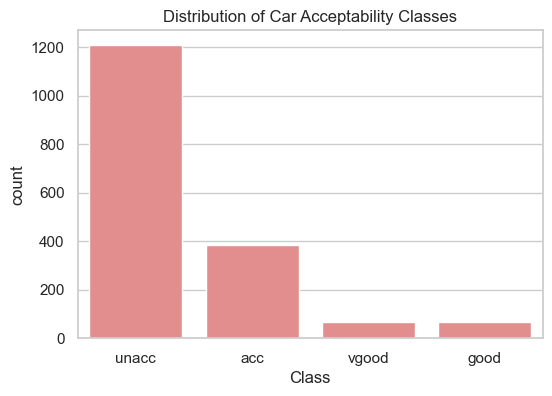

In [24]:
# Plot the distribution of the target classes (car acceptability)
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=car_data , color='lightcoral')
plt.title("Distribution of Car Acceptability Classes")
plt.show()


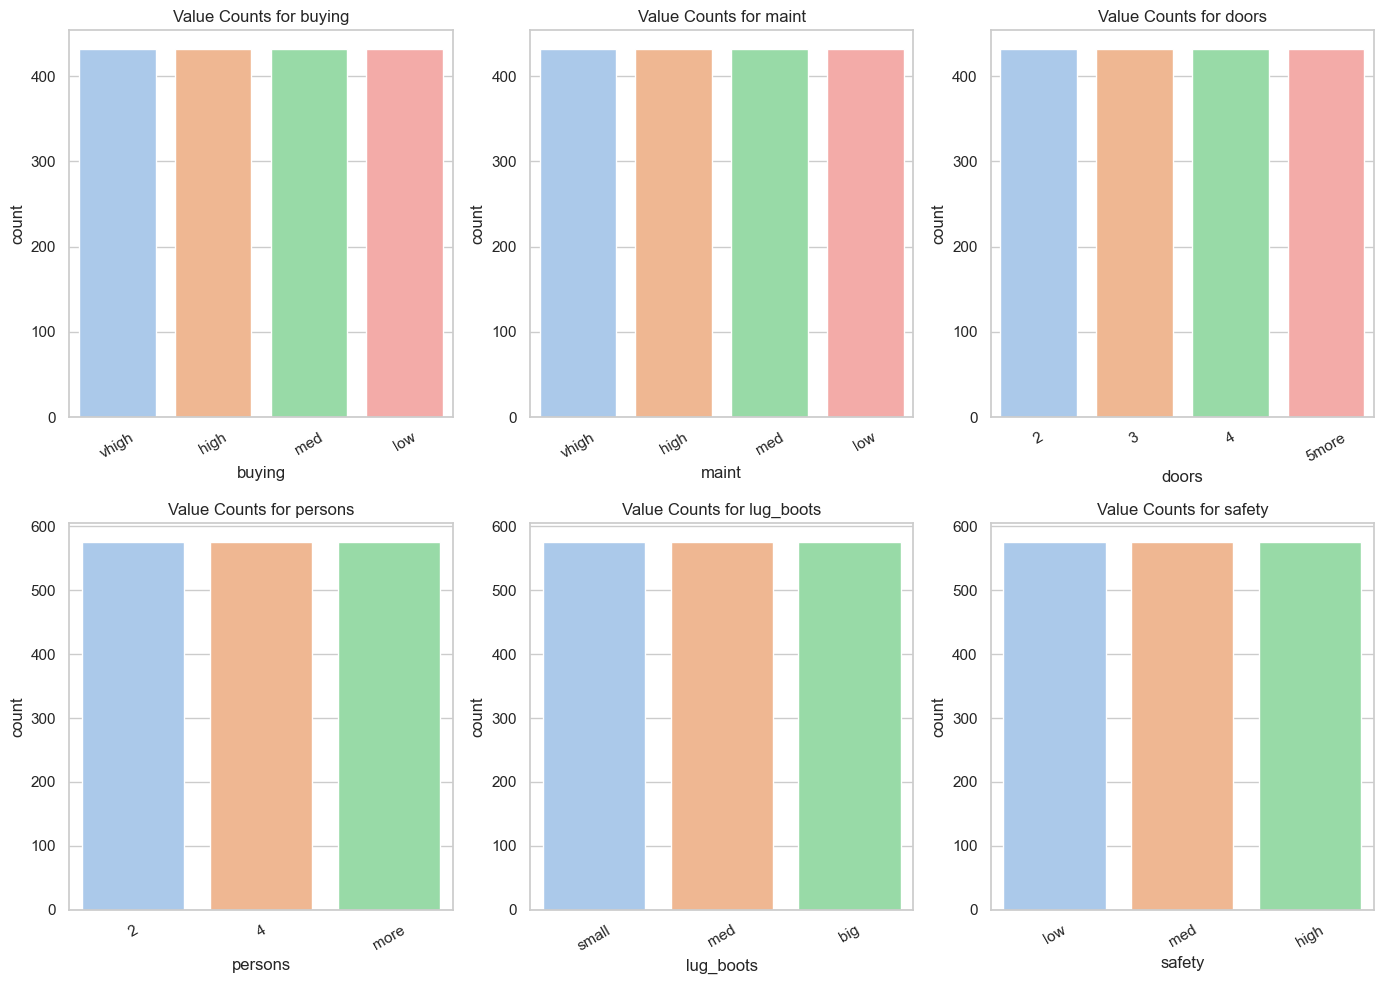

In [32]:
# Show value counts for some categorical features to understand their categories
cols = ["buying", "maint", "doors", "persons", "lug_boots", "safety"]

plt.figure(figsize=(14, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)          # 2 rows, 3 columns of subplots
    sns.countplot(x=col, data=car_data, palette='pastel' , hue=col , legend=False)
    plt.title(f"Value Counts for {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()

plt.show()

### 4. Seperate Features and Target and perform Train/test split :

In [37]:
# Separate features (X) and target (y)
X = car_data.drop("Class", axis=1)  # All columns except the target
y = car_data["Class"]               # Target column with 4 possible categories

# Split into training and testing sets (80% train, 20% test)
# stratify=y keeps the same class distribution in train and test datasets :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1382, 6)
Test set size: (346, 6)


### 5. Preprocessing + Decision Tree pipeline

In [38]:
# All features are categorical in this dataset
categorical_cols = X.columns.tolist()

# >> We need to transform the categorical variables into numbers that the computer can understand. Thus, we use One-Hot-Encoding: 
# Define a ColumnTransformer to one‑hot encode categorical features
preprocess = ColumnTransformer(transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)])

# Define the Decision Tree classifier
dt_clf = DecisionTreeClassifier(
    criterion="gini",   
    max_depth=None,     
    random_state=42)

# Build a pipeline that first preprocesses the data, then fits the model
dt_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", dt_clf)])

### 6. Train and evaluate the Decision Tree:

In [44]:
# Train the decision tree model on the training data
dt_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_test = dt_pipeline.predict(X_test)
y_pred_train = dt_pipeline.predict(X_train)

# Compute and print accuracy
dt_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Decision Tree Accuracy on test set:", dt_accuracy_test)

dt_accuracy_train = accuracy_score(y_train, y_pred_train)
print("Decision Tree Accuracy on train set:", dt_accuracy_train)

# Show a detailed classification report (precision, recall, f1-score per class)
print("\nClassification report (Decision Tree):")
print(classification_report(y_test, y_pred_test))

# Show the confusion matrix to see how predictions match true labels
print("\nConfusion matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_test))

Decision Tree Accuracy on test set: 0.9739884393063584
Decision Tree Accuracy on train set: 1.0

Classification report (Decision Tree):
              precision    recall  f1-score   support

         acc       0.96      0.92      0.94        77
        good       0.88      1.00      0.93        14
       unacc       0.98      1.00      0.99       242
       vgood       1.00      0.85      0.92        13

    accuracy                           0.97       346
   macro avg       0.95      0.94      0.95       346
weighted avg       0.97      0.97      0.97       346


Confusion matrix (Decision Tree):
[[ 71   2   4   0]
 [  0  14   0   0]
 [  1   0 241   0]
 [  2   0   0  11]]


* This pattern is consistent with an **overfitted tree**.

* We observe a perfect accuracy on the training set and slightly lower accuracy on the test set, with a very deep tree that **memorizes** the training data instead of understanding the **patterns to generalize**.

* The model is clearly more complex than necessary for this dataset, so introducing regularization via **hyperparameter tuning** will help us overcome this overfitting issue and produce a more **robust** model with a great **generalization** power .

### 7. Hyperparameter tuning :

In [52]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning of the decision tree
param_grid_dt = {
    "classifier__max_depth": [2, 3, 4, 5, 6 , 7, 8]
}

# Set up GridSearchCV to search over the hyperparameters
grid_search_dt = GridSearchCV(
    dt_pipeline,          # pipeline (preprocessing + classifier)
    param_grid=param_grid_dt,
    cv=5,                 # 5-fold cross-validation
    scoring="accuracy",   # optimize for accuracy
    n_jobs=-1,            # use all CPU cores if possible
    verbose=1
)

# Run the grid search on the training data
grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation accuracy:", grid_search_dt.best_score_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters for Decision Tree: {'classifier__max_depth': 8}
Best cross-validation accuracy: 0.9240098362371161


In [53]:
# Extract the best model (pipeline with tuned hyperparameters)
best_dt_model = grid_search_dt.best_estimator_

# Evaluate tuned model on train and test sets
y_train_pred_tuned = best_dt_model.predict(X_train)
y_test_pred_tuned = best_dt_model.predict(X_test)

tuned_train_accuracy = accuracy_score(y_train, y_train_pred_tuned)
tuned_test_accuracy = accuracy_score(y_test, y_test_pred_tuned)

print("Tuned Decision Tree Accuracy on train set:", tuned_train_accuracy)
print("Tuned Decision Tree Accuracy on test set:", tuned_test_accuracy)

print("\nClassification report (Tuned Decision Tree):")
print(classification_report(y_test, y_test_pred_tuned))

print("\nConfusion matrix (Tuned Decision Tree):")
print(confusion_matrix(y_test, y_test_pred_tuned))


Tuned Decision Tree Accuracy on train set: 0.9450072358900145
Tuned Decision Tree Accuracy on test set: 0.9364161849710982

Classification report (Tuned Decision Tree):
              precision    recall  f1-score   support

         acc       0.84      0.88      0.86        77
        good       0.91      0.71      0.80        14
       unacc       0.97      0.98      0.98       242
       vgood       0.90      0.69      0.78        13

    accuracy                           0.94       346
   macro avg       0.90      0.82      0.85       346
weighted avg       0.94      0.94      0.94       346


Confusion matrix (Tuned Decision Tree):
[[ 68   1   7   1]
 [  4  10   0   0]
 [  5   0 237   0]
 [  4   0   0   9]]


Model Comparison:
                      Model  Train Accuracy  Test Accuracy  Train-Test Gap
0             Original Tree           1.000          0.974           0.026
1  Tuned Tree (max_depth=8)           0.945          0.936           0.009


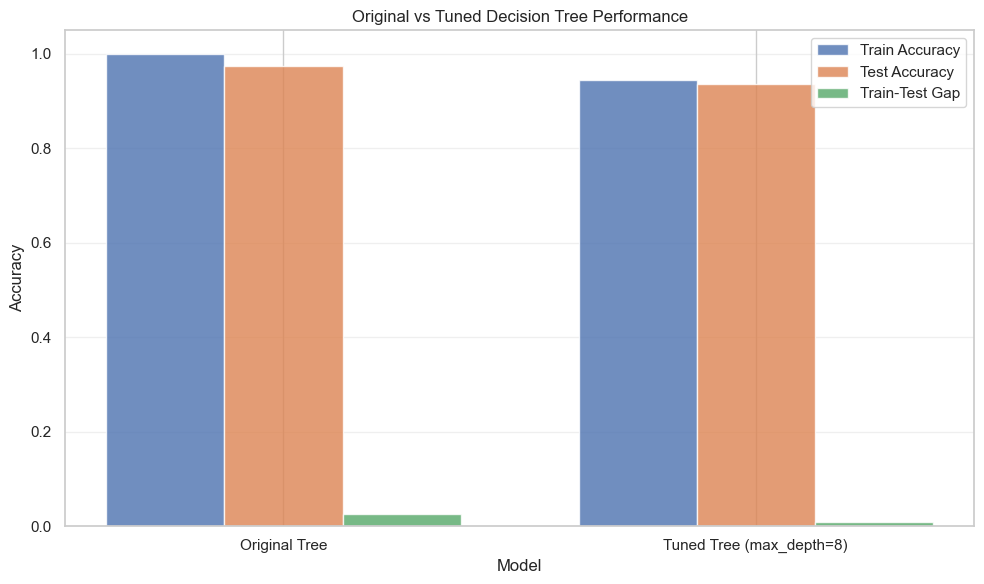

In [ ]:
# Final comparison table Between Original and Tuned Algorithms:
comparison_data = {
    "Model": ["Original Tree", "Tuned Tree (max_depth=8)"],
    "Train Accuracy": [1.000, 0.945],
    "Test Accuracy": [0.974, 0.936],
    "Train-Test Gap": [0.026, 0.009]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Comparison:")
print(comparison_df.round(3))

# Plot 1: Bar chart comparison
plt.figure(figsize=(10, 6))
x = range(len(comparison_df))
width = 0.25

plt.bar([i - width for i in x], comparison_df['Train Accuracy'], width, label='Train Accuracy', alpha=0.8)
plt.bar(x, comparison_df['Test Accuracy'], width, label='Test Accuracy', alpha=0.8)
plt.bar([i + width for i in x], comparison_df['Train-Test Gap'], width, label='Train-Test Gap', alpha=0.8)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Original vs Tuned Decision Tree Performance')
plt.xticks(x, comparison_df['Model'])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 8. Final Interpretation :

***Before tuning (Original Tree)***:

* Perfect on training data (100%) → memorized every training example (overfitting)
* 97.4% test accuracy → still good, but risky generalization to new cars
* Very deep tree → hundreds of complex rules, hard for managers to understand

*Risk: it will fail badly on future cars with slightly different characteristics because of overfitting which is memorizing by heart the examples instead of understanding the pattern to generalize more*



***After tuning (max_depth=8)***:

* 94.5% train, 93.6% test → consistent performance across datasets
* Much smaller train-test gap (0.9% vs 2.6%) → reliable generalization to new cars
* Shallow tree (8 levels max) → simple if-then rules that managers can understand , trust and explain
* Stable performance → safer for business decisions about car fleet selection as generalization power is higher
